# Week 2: Day 2 PM // Math: Linear Algebra

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
sy.init_printing() 

## Linear Transformation

There many new terminologies in this chapter, however they are not entirely new to us.

Let $V$ and $W$ be vector spaces. The mapping $T:\ V\rightarrow W$ is called alinear transformation if an only if

$$
T(u+v)=T(u)+T(v)\quad \text{and} \quad T(cu)=cT(u)
$$

for all $u,v\in V$ and all $c\in R$. If $T:\ V\rightarrow W$, then $T$ is called a linear operator. For each $u\in V$, the vector $w=T(u)$ is called the of $u$ under $T$.

### Parametric Function Plotting

We need one tool for illustrating the idea of linear transformation.

We want to plot any line in vector space by an equation: $p = p_0+tv$. We need to know vector $p_0$ and $v$ to plot the line. 

For instance, $p_0 = (2, 6)$, $v=(5, 3)$ and $p = (x, y)$, subsitute them into our equation
$$
\left[
\begin{matrix}
x\\y
\end{matrix}
\right]=\left[
\begin{matrix}
2\\6
\end{matrix}
\right]+
t\left[
\begin{matrix}
5\\3
\end{matrix}
\right]
$$

In [ ]:
def paraEqPlot(p0, v0, p1, v1):
    t = np.linspace(-5, 5)
    ################### First Line ####################
    fig, ax = plt.subplots(figsize = (10, 10))
    x = p0[0,:] + v0[0,:]*t
    y = p0[1,:] + v0[1,:]*t
    ax.plot(x, y, lw = 3, color = 'red')
    ax.grid(True)
    ax.scatter(p0[0,:], p0[1,:], s = 150, ec = 'red', fc = 'black', zorder = 3)
    
    ################### First Line ####################
    x = p1[0,:] + v1[0,:]*t
    y = p1[1,:] + v1[1,:]*t
    ax.plot(x, y, lw = 3, color = 'blue')
    ax.grid(True)
    ax.scatter(p1[0,:], p1[1,:], s = 150, ec = 'red', fc = 'black', zorder = 3)
    
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    string =  '$(%.d, %.d)$' % (p0[0,:], p0[1,:])
    ax.text(x= p0[0,:]+.5, y = p0[1,:], s = string, size = 14)
    
    string =  '$(%.d, %.d)$' % (p1[0,:], p1[1,:])
    ax.text(x= p1[0,:]+.5, y = p1[1,:], s = string, size = 14)

### A Simple Linear Transformation

Now we know the parametric functions in $\mathbb{R}^2$, we can show how a linear transformation acturally works on a line.

Let's say, we perform linear transformation on a vector $(x, y)$, 

$$
T\left(\left[\matrix{x\cr y}\right]\right)=\pmatrix{3x-2y\cr -2x+3y}\\
$$
and substitute the parametric function into the linear operator.

$$
T\left(\left[\matrix{4+t\cr 5+3t}\right]\right)=\pmatrix{3(4+t)-2(5+3t)\cr -2(4+t)+3(5+3t)}=\left[
\begin{matrix}
2-3t\\7+7t
\end{matrix}
\right]
$$

The red line is transformed into

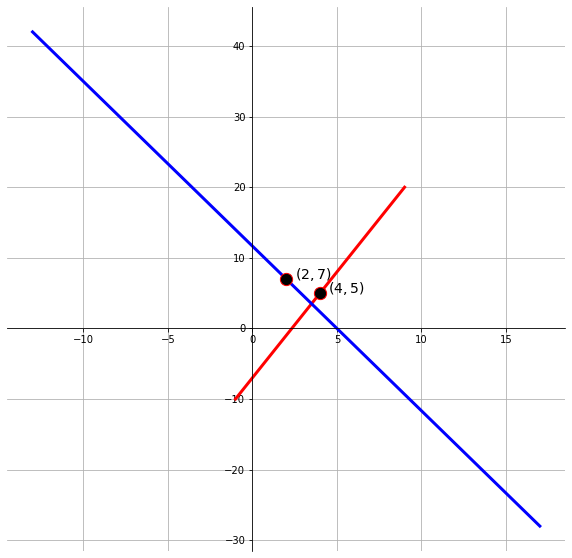

In [ ]:
p0 = np.array([[4],[5]])
v0 = np.array([[1],[3]])
p1 = np.array([[2],[7]])
v1 = np.array([[-3],[7]])
paraEqPlot(p0,v0,p1, v1)

### Visualization of Change of Basis

Change of basis is also a kind of linear transformation. Let's create a grid.

In [ ]:
u1, u2 = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
U1, U2 = np.meshgrid(u1, u2)

We plot each row of $U2$ again each row of $U1$

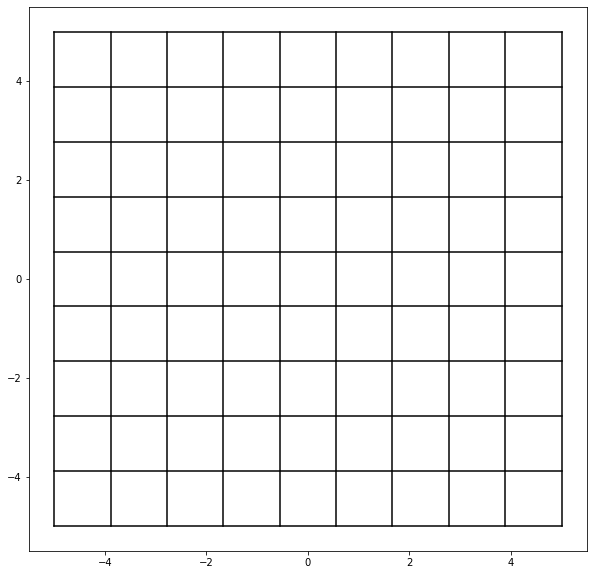

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(U1,U2, color = 'black') 
ax.plot(U1.T,U2.T, color = 'black') 
plt.show()

Let $A$ and $B$ be two bases in $\mathbb{R}^3$
 
$$
A=\left\{\left[\matrix{2\cr 1}\right],\ \left[\matrix{1\cr 1}\right]\right\}\\
B=\left\{\left[\matrix{3\cr 2}\right],\ \left[\matrix{0\cr -1}\right]\right\}\\
$$

If we want to use basis $A$ to represent $B$, we can construct an augmented matrix like we did before.

$$
[A|B]=
\left[
\begin{matrix}
2 & 1 & 3 & 0\\
1 & 1 & 2 & -1
\end{matrix}
\right]
$$

In [ ]:
AB = sy.Matrix([[2,1,3,0],[1,1,2,-1]]); AB.rref()

⎛⎡1  0  1  1 ⎤        ⎞
⎜⎢           ⎥, (0, 1)⎟
⎝⎣0  1  1  -2⎦        ⎠

We find the transition matrix $P_{A\leftarrow B}$
$$
[A|B]=[I|P_{A\leftarrow B}]
$$

We can write

$$
\big[x\big]_A = P_{A\leftarrow B}\big[u\big]_B\\
\left[
\begin{matrix}
x_1\\x_2
\end{matrix}
\right]
=
\left[
\begin{matrix}
1 & 1\\1 & -2
\end{matrix}
\right]
\left[
\begin{matrix}
u_1\\u_2
\end{matrix}
\right]\\
$$

Therefore
$$
x_1 = u_1+u_2\\
x_2 = u_1 - 2u_2
$$

Let's plot original and transformed coordinates together.

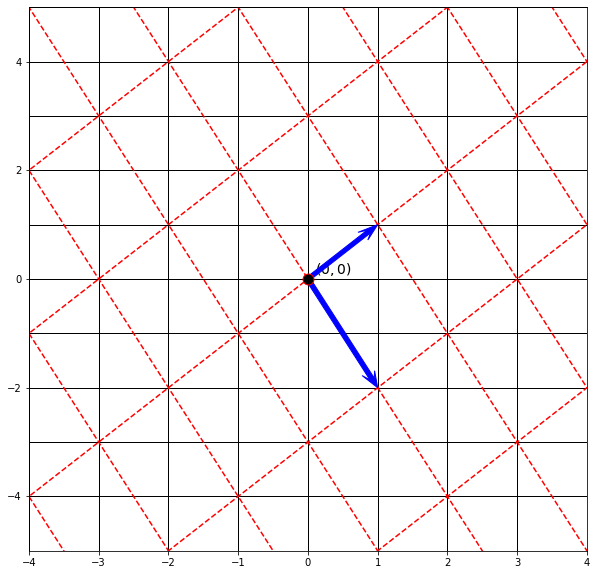

In [ ]:
u1, u2 = np.linspace(-10, 10, 21), np.linspace(-10, 10, 21)
U1, U2 = np.meshgrid(u1, u2)

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(U1,U2, color = 'black', lw = 1) 
ax.plot(U1.T,U2.T, color = 'black', lw = 1) 

X1 = U1 +U2
X2 = U1 - 2*U2
ax.plot(X1,X2, color = 'red', ls = '--') 
ax.plot(X1.T,X2.T, color = 'red', ls = '--') 

ax.arrow(0, 0, 1, 1, color = 'blue', width = .07, 
     length_includes_head = True,
     head_width = .2, # default: 3*width
     head_length = .3, zorder = 4,
     overhang = .4)

ax.arrow(0, 0, 1, -2, color = 'blue', width = .07, 
     length_includes_head = True,
     head_width = .2, # default: 3*width
     head_length = .3,zorder = 4,
     overhang = .4)

ax.text(0.1,0.1,'$(0, 0)$',size = 14)
ax.scatter(0,0,s = 120, zorder = 5, ec = 'red', fc = 'black')

ax.axis([-4, 4, -5, 5])
plt.show()

## Visualization of Linear Combination in $\mathbb{R}^2$

Consider two vectors $u$ and $v$ in $\mathbb{R}^2$, and they are independent of each other, i.e. not pointing to the same or opposite direction. Therefore any vector in the $\mathbb{R}^2$ can be represented by a linear combination of $u$ and $v$

For instance, this is a linear combination and essentially a linear system.

$$
c_1
\left[
\begin{matrix}
4\\
2
\end{matrix}
\right]+
c_2
\left[
\begin{matrix}
-2\\
2
\end{matrix}
\right]
=
\left[
\begin{matrix}
2\\
10
\end{matrix}
\right]
$$

Solve the system in SymPy:

In [ ]:
A = sy.Matrix([[4, -2, 2], [2,2,10]])
A.rref()

The solution is $(c_1, c_2)^T = (2, 3)^T$, which means the sum of 2 times of $\left[
\begin{matrix}
4\\
2
\end{matrix}
\right]$ and 3 times of $\left[
\begin{matrix}
-2\\
2
\end{matrix}
\right]$ is $\left[
\begin{matrix}
2\\
10
\end{matrix}
\right]$. 

Besides plotting the vectors and its addition, we would like to plot the coordinates of basis that spanned by $u$ and $v$ as well. We will explain further in later chapter.

We can calcuate the slope of vectors
$$
s_1 =\frac{y}{x} = \frac{2}{4}=.5\\
s_2 =\frac{y}{x}= \frac{2}{-2}=.-1
$$

The basis can be constructed as:
$$
y_1 = a+.5x\\
y_2 = b-x
$$

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

vec = np.array([[[0,0,4,2]],
                 [[0,0,-2,2]],
                 [[0,0,2,10]],
                 [[0,0,8,4]], 
                 [[0,0,-6,6]]])
colors = ['b','b','r','b','b']

for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = colors[i], scale=1, alpha = .6)
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

points12 = np.array([[8,4],[2,10]])
ax.plot(points12[:,0], points12[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

points34 = np.array([[-6, 6],[2,10]])
ax.plot(points34[:,0], points34[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

ax.set_xlim([-10, 10])
ax.set_ylim([0, 10.5])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

######################################Basis########################################
a = np.arange(-11, 20, 1)
x = np.arange(-11, 20, 1)

for i in a:    
    y1 = i + .5*x
    ax.plot(x, y1, ls = '--', color = 'pink', lw = 2)
    y2 = i - x
    ax.plot(x, y2, ls = '--', color = 'pink', lw = 2)    

ax.set_title('Linear Combination of Two Vectors in $\mathbf{R}^2$', size = 22, x =0.5, y = 1.01)
plt.show()

## Linear Combination Visualization in 3D

We can show that any vectors in $\mathbb{R}^3$ can be a linear combination of a standard basis, which we will see again later.This time, we upgrade the difficulty, we create a function for drawing linear combination of standard basis in 3D, we only need to provide the scalar multiplier.

In [ ]:
def linearCombo(a, b, c):
    %matplotlib notebook
    '''This function is for visualizing linear combination of standard basis in 3D.
    Function syntax: linearCombo(a, b, c), where a, b, c are the scalar multiplier, 
    also the elements of the vector.
    '''
    fig, ax = plt.subplots(figsize = (8, 8))
    ax = fig.gca(projection='3d')
    ######################## Standard basis and Scalar Multiplid Vectors#########################
    vec = np.array([[[0, 0, 0, 1, 0, 0]], # e1
                    [[0, 0, 0, 0, 1, 0]], # e2
                    [[0, 0, 0, 0, 0, 1]], # e3
                    [[0, 0, 0, a, 0, 0]], # a* e1
                    [[0, 0, 0, 0, b, 0]], # b* e2
                    [[0, 0, 0, 0, 0, c]], # c* e3
                    [[0, 0, 0, a, b, c]]]) # ae1 + be2 + ce3
    colors = ['b','b','b','r','r','r','g']
    for i in range(vec.shape[0]): 
        X, Y, Z, U, V, W = zip(*vec[i,:,:])
        ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, 
                  color = colors[i] ,arrow_length_ratio = .08, pivot = 'tail',
                  linestyles = 'solid',linewidths = 3, alpha =.6)
    
    #################################Plot Rectangle Boxes##############################
    dlines = np.array([[[a, 0, 0],[a, b, 0]],
                      [[0, b, 0],[a, b, 0]],
                      [[0, 0, c],[a, b, c]],
                      [[0, 0, c],[a, 0, c]],
                      [[a, 0, c],[a, b, c]],
                      [[0, 0, c],[0, b, c]],
                      [[0, b, c],[a, b, c]],
                      [[a, 0, 0],[a, 0, c]],
                      [[0, b, 0],[0, b, c]],
                      [[a, b, 0],[a, b, c]]])
    colors = ['k','k','g','k','k','k','k','k','k']
    for i in range(dlines.shape[0]):
        ax.plot(dlines[i,:,0], dlines[i,:,1], dlines[i,:,2], lw =3, ls = '--', color = 'black', alpha=0.5)
    
    #################################Annotation########################################
    ax.text(x = a, y = b, z = c, s= ' $(%0.d, %0.d, %.0d)$'% (a, b, c), size = 18)
    ax.text(x = a, y = 0, z = 0, s= ' $%0.d e_1 = (%0.d, 0, 0)$'% (a, a), size = 15)
    ax.text(x = 0, y = b, z = 0, s= ' $%0.d e_2 = (0, %0.d, 0)$'% (b, b), size = 15)
    ax.text(x = 0, y = 0, z = c, s= ' $%0.d e_3 = (0, 0, %0.d)$' %(c, c), size = 15)
    
    #################################Axis Setting######################################
    ax.grid()
    ax.set_xlim([0, a+1])
    ax.set_ylim([0, b+1])
    ax.set_zlim([0, c+1])
    
    ax.set_xlabel('x-axis', size = 18)
    ax.set_ylabel('y-axis', size = 18)
    ax.set_zlabel('z-axis', size = 18)
    
    ax.set_title('Vector $(%0.d, %0.d, %.0d)$ Visualization' %(a, b, c), size = 20)
    
    ax.view_init(elev=20., azim=15)

if __name__ == '__main__':
    a = 7
    b = 4
    c = 9
    linearCombo(a, b, c)


## Linear Combination of Inconsistent System

### One Free Variable

We have seen how inconsistent systems can be solved in the earlier lectures.Now we will see what solution means from the perspective of linear combination.

Consider a system

$$
\left[
\begin{matrix}
1 & 1 & 2\\
-2 &0 & 1\\
1& 1 & 2
\end{matrix}
\right]
\left[
\begin{matrix}
c_1\\c_2\\c_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
1\\-3\\1
\end{matrix}
\right]
$$

Solve in SymPy:

In [ ]:
A = sy.Matrix([[1,1,2,1],[-2,0,1,-3],[1,1,2,1]])
A.rref()

The solution is not unique, due to a free variable: 

$$
c_1 - \frac{1}{2}c_3 =\frac{3}{2}\\
c_2 + \frac{5}{2}c_3 = -\frac{1}{2}\\
c_3 = free
$$

Let $c_3 = t$,  the system can be parameterized:

$$
\left[
\begin{matrix}
c_1\\c_2\\c_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
\frac{3}{2}+\frac{1}{2}t\\
-\frac{1}{2}-\frac{5}{2}t\\
t
\end{matrix}
\right]
$$

The solution is a line with infinite length, but we can still visualize a segment if we set the range.

For instance, we set the range of $t\in (-1, 1)$, the solution looks like:

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

t = np.linspace(-1, 1, 10)
c1 = 3/2+t/2
c2 = -1/2-5/2*t

ax.plot(c1, c2, t, lw = 5)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.set_title('Solution of A Linear System with One Free Variable', size = 18)
plt.show()

### Two Free Variables

Now consider the linear system:

$$
\left[
\begin{matrix}
1 & -3 & -2\\
0 &0 & 0 \\
0& 0 & 0 
\end{matrix}
\right]
\left[
\begin{matrix}
x_1\\
x_2\\
x_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
0\\0\\0
\end{matrix}
\right]
$$

The augmented matrix is

$$
\left[
\begin{matrix}
1 & -3 & -2 & 0\\
0 &0 & 0 & 0\\
0& 0 & 0 & 0
\end{matrix}
\right]
$$

Then we have two free variables
$$
\begin{align}
x_1 &= 3x_2+2x_3\\
x_2 &= free\\
x_3 &= free
\end{align}
$$
Rewrite the solution 

$$
\left[
\begin{matrix}
x_1\\
x_2\\
x_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
3x_2+2x_3\\
x_2\\
x_3
\end{matrix}
\right]
=
\left[\begin{array}{c}
3 x_{2} \\
x_{2} \\
0
\end{array}\right]+\left[\begin{array}{c}
2 x_{3} \\
0 \\
x_{3}
\end{array}\right]=
x_{2}\left[\begin{array}{l}
3 \\
1 \\
0
\end{array}\right]+x_{3}\left[\begin{array}{l}
2 \\
0 \\
1
\end{array}\right]
$$

The solution is a plain spanned by two vectors $(3, 1, 0)^T$ and $(2, 0, 1)^T$. Let's visualize the plane and spanning vectors.

We also plot another vector $v = (2,2,1)$ which is not a linear combination of $(3, 1, 0)^T$ and $(2, 0, 1)^T$. As you pan around the view angle, it is apparent that $v$ is not in the same plane of basis vectors.

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

x2 = np.linspace(-2, 2, 10)
x3 = np.linspace(-2, 2, 10)
X2, X3 = np.meshgrid(x2, x3)
X1 = 3*X2 + 2*X3
ax.plot_wireframe(X1, X2, X3, linewidth = 1.5, color = 'k', alpha = .6)

vec = np.array([[[0, 0, 0, 3, 1, 0]],
               [[0, 0, 0, 2, 0, 1]],
               [[0, 0, 0, 5, 1, 1]],
               [[0, 0, 0, 2, 2, 1]]])
colors = ['r', 'b', 'g', 'purple']
for i in range(vec.shape[0]):
    X, Y, Z, U, V, W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = colors[i],
              arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3, alpha = .6)

################################Dashed Line################################

point12 = np.array([[2, 0, 1],[5, 1, 1]])
ax.plot(point12[:,0], point12[:,1], point12[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

point34 = np.array([[3, 1, 0], [5, 1, 1]])
ax.plot(point34[:,0], point34[:,1], point34[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

#################################Texts#######################################
ax.text(x = 3, y = 1, z = 0, s='$(3, 1, 0)$', color = 'red', size = 16)
ax.text(x = 2, y = 0, z = 1, s='$(2, 0, 1)$', color = 'blue', size = 16)
ax.text(x = 5, y = 1, z = 1, s='$(5, 1, 1)$', color = 'green', size = 16)
ax.text(x = 2, y = 2, z = 1, s='$v$', color = 'purple', size = 16)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(elev=-29, azim=130)


## Linear Combination of Polynomial

In a more general sense, a funcion or a polynomial can also be a linear combination of other functions or polynomials.

Now consider a polynomial $p(x)=4 x^{3}+5 x^{2}-2 x+7$, determine if it is a linear combination of three polynomials below:
$$
p_{1}(x)=x^{3}+2 x^{2}-x+1\\
p_{2}(x)=2 x^{3}+x^{2}-x+1\\
p_{3}(x)=x^{3}-x^{2}-x-4
$$

which means that we need to figure out if the equation below holds

$$
c_{1}\left(x^{3}+2 x^{2}-x+1\right)+c_{2}\left(2 x^{3}+x^{2}-x+1\right)+c_{3}\left(x^{3}-x^{2}-x-4\right)=4 x^{3}+5 x^{2}-2 x+7
$$

Rearrange and collect terms
$$
\left(c_{1}+2 c_{2}+c_{3}\right) x^{3}+\left(2 c_{1}+c_{2}-c_{3}\right) x^{2}+\left(-c_{1}-c_{2}-c_{3}\right) x+\left(c_{1}+c_{2}-4 c_{3}\right)=4 x^{3}+5 x^{2}-2 x+7
$$

Equate the coefficients and extract the augmented matrix
$$
\begin{aligned}
&c_{1}+2 c_{2}+c_{3}=4\\
&2 c_{1}+c_{2}-c_{3}=5\\
&-c_{1}-c_{2}-c_{3}=-2\\
&c_{1}+c_{2}-4 c_{3}=7\\
&\left(\begin{array}{cccc}
1 & 2 & 1 & 3 \\
2 & 1 & -1 & 5 \\
-1 & -1 & -1 & -2 \\
1 & 1 & -4 & 7
\end{array}\right)
\end{aligned}
$$

Before solving, we notice that the system has 4 equations, but 3 unknowns, this case is called over-determined.

In [ ]:
A = sy.Matrix([[1,2,1,4],[2,1,-1,5],[-1,-1,-1,-2],[1,1,-4,7]])
A.rref()

We get the answer
$$
\left(x^{3}+2 x^{2}-x+1\right)+2\left(2 x^{3}+x^{2}-x+1\right)-\left(x^{3}-x^{2}-x-4\right)=4 x^{3}+5 x^{2}-2 x+7
$$

Indeed we have just established a linear combination between these polynomials.

In [ ]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

In [ ]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha)

Linear Dependence and Span

Since it is all about systems of linear equations, let's start again with the set of equations:

$$\boldsymbol{Ax}=\boldsymbol{b}$$

This system corresponds to:

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_n
$$

So we have multiple equations with multiple unknowns. We know $A_{1,1}...A_{m,n}$ and $b_1...b_n$. To solve the system we need to find the values of the variables $x_1...x_n$ that satisfies all equations.

## Number of solutions

The first thing to ask when we face such a system of equations is: what is the number of solutions ?

Three cases can represent the number of solutions of the system of equations $\boldsymbol{Ax}=\boldsymbol{b}$.
 
 1. No solution
 2. 1 solution
 3. An infinite number of solutions
 
### Why there can't be more than 1 solution and less than an infinite number of solutions ?

#### Intuition

Simply because we deal with **linear** systems! Two lines can't cross more than once.

To be able to visualize it, let's take two dimensions and two equations. The solutions of the system correspond to the intersection of the lines. One option is that the two lines never cross (parallel). Another option is that they cross once. And finally, the last option is that they cross everywhere (superimposed):

<img src="images/number-solutions-system-equations.png" width="700" alt="Examples of systems of equations with 0, 1 and an infinite number of solutions" title="System of equations with 0, 1 and an infinite number of solutions">
<em>A system of equations has no solution, 1 solution or an infinite number of solutions</em>

    Two lines can't cross more than once but can be either parallel or superimposed

### Proof

Let's imagine that $\boldsymbol{x}$ and $\boldsymbol{y}$ are two solutions of our system. This means that

$$
\begin{cases}
\boldsymbol{Ax}=\boldsymbol{b}\\\\
\boldsymbol{Ay}=\boldsymbol{b}
\end{cases}
$$

In that case, we will see that $\boldsymbol{z}=\alpha \boldsymbol{x} + (1-\alpha \boldsymbol{y})$ is also a solution for any value of $\alpha$. If $\boldsymbol{z}$ is a solution, we can say that $\boldsymbol{Az}=\boldsymbol{b}$. Indeed, if we plug $\boldsymbol{z}$ into the left hand side of the equation we obtain:

$$
\begin{align*}
\boldsymbol{Az}&=\boldsymbol{A}(\alpha x + (1-\alpha y))\\\\
    &=\boldsymbol{Ax}\alpha + \boldsymbol{A}(1-\alpha y)\\\\
    &=\boldsymbol{Ax}\alpha + \boldsymbol{Ay}(1-\alpha)
\end{align*}
$$

And since $\boldsymbol{Ax}=\boldsymbol{Ay}=\boldsymbol{b}$. This leads to:

$$
\begin{align*}
\boldsymbol{Az}&=\boldsymbol{b}\alpha + \boldsymbol{b}(1-\alpha)\\\\
    &=\boldsymbol{b}\alpha + \boldsymbol{b}-\boldsymbol{b}\alpha\\\\
    &=\boldsymbol{b}
\end{align*}
$$

So $\boldsymbol{z}$ is also a solution.

## Matrix representation of the system

As we saw it, the equation $\boldsymbol{Ax}=\boldsymbol{b}$ can be represented by a matrix $\boldsymbol{A}$ containing the weigths of each variable and a vector $\boldsymbol{x}$ containing each variable. The product of $\boldsymbol{A}$ and $\boldsymbol{x}$ gives $\boldsymbol{b}$ that is another vector of size $m$:

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\\\
    b_2 \\\\
    \cdots \\\\
    b_m
\end{bmatrix}
$$

Which corresponds to the set of linear equations

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_n
$$

Here are some intuitions about what is represented by these matrices. The number of columns of $\boldsymbol{A}$ is the number of dimensions of our vector space. It is the number $n$ of directions we can travel by. The number of solutions of our linear system corresponds to the number of ways we can reach $\boldsymbol{b}$ by travelling through our $n$ dimensions.

But to understand this, we need to underline that two possibilities exist to represent the system of equations: ***the row figure*** and ***the column figure***.

## Graphical views: Row and column figures

When you are looking to the matrix $\boldsymbol{A}$:

$$
\boldsymbol{A}=\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

You can consider its rows or its columns separately. Recall that the values are the weights corresponding to each variable. Each row synthetizes one equation. Each column is the set of weights given to 1 variable.

It is possible to draw a different graphical represention of the set of equations looking at the rows or at the columns.

### Graphical view 1: the row figure

The row figure is maybe more usual because it is the representation used when we have only one equation. It can now be extended to an infinite number of equations and unknowns (even if it would be hard to represent a 9-dimensional hyperplane in a 10-dimensional space...).

We said that the solutions of the linear system of equations are the sets of values of $x_1...x_n$ that satisfies all equations, that is to say, the values taken by the unknowns. For instance, in the case of $\boldsymbol{A}$ being a ($2 \times 2$) matrix ($n=m=2$) the equations correspond to lines in a 2-dimensional space and the solution of the system is the intersection of these lines.

Note that associating one direction in space to one parameter is only one way to represent the equations. There are number of ways to represent more than 3 parameters systems. For instance, you can add colors to have the representation of a fourth dimension. It is all about **representation**.

<img src="images/representing-features.png" width="900" alt="Different ways of representing features" title="Feature representation">
<em>Graphical representations of features</em>

#### Overdetermined and underdetermined systems

A linear system of equations can be viewed as a set of $(n-1)$-dimensional hyperplanes in a *n*-dimensional space. So the linear system can be characterized with its number of equations ($m$) and the number of unknown variables ($n$).

- If there are more equations than unknows the system is called **overdetermined**. In the following example we can see a system of 3 equations (represented by 3 lines) and 2 unknowns (corresponding to 2 dimensions). In this example there is no solution since there is no point belonging to the three lines:

<img src="images/overdetermined-system-linear-equations.png" width="300" alt="Example of an overdetermined system of linear equations with no solution" title="Example of an overdetermined system of linear equations with no solution">
<em>Example of an overdetermined system of linear equations with no solution</em>

- If there is more unknowns than equations the system is called **underdetermined**. In the following picture, there is only 1 equation (1 line) and 2 dimensions. Each point that is on the line is a solution of the system. In this case there is an infinite number of solutions:

<img src="images/underdetermined-system-linear-equations.png" width="300" alt="Example of an underdetermined system of linear equations with an infinite number of solutions" title="Example of an underdetermined system of linear equations with an infinite number of solutions">
<em>Example of an underdetermined system of linear equations with an infinite number of solutions</em>


Let's see few examples of these different cases to clarify that.

### Example 1. 

$m=1$, $n=2$: **1 equation and 2 variables**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1
$$

The graphical interpretation of $n=2$ is that we have a 2-D space. So we can represent it with 2 axes. Since our hyperplane is of $n-1$-dimensional, we have a 1-D hyperplane. This is simply a line. As $m=1$, we have only one equation. This means that we have only one line characterizing our linear system.

Note that the last equation can also be written in a way that may be more usual:

$$
y = ax + b
$$

with $y$ corresponding to $x_2$, $x$ corresponding to $x_1$, $a$ corresponding to $A_{1,1}$ and $A_{1,2}=1$.

For this first example we will take the following equation:

$$
y = 2x + 1
$$

Let's draw the line of this equation with Numpy and Matplotlib (see BONUS in [2.3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/) for light tips to plot equations).

In [ ]:
x = np.arange(-10, 10)
y = 2*x + 1

plt.figure()
plt.plot(x, y)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

#### Solutions

The solutions of this linear system correspond to the value of $x$ and $y$ such as $y=2x+1$. Graphically, it corresponds to each point on the line so there is an infinite number of solutions. For instance, one solution is $x=0$ and $y=1$, or $x=1$ and $y=3$ and so on.

### Example 2.

*m*=2, *n*=2: **2 equations and 2 unknowns**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2
$$

The graphical interpretation of this system is that we still have lines in a 2-D space. However this time there are 2 lines since there are 2 equations.

Let's take these equations as example:

$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2
\end{cases}
$$


In [ ]:
x = np.arange(-10, 10)
y = 2*x + 1
y1 = 6*x - 2

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

As we have seen, with 2 lines in a 2-D space, there are multiple possible cases. On the above figure, the two lines are crossing so there is one unique solution. If they are superimposed (same equation or equivalent, *cf*. linear dependance bellow) there are a infinite number of solutions since each points of the lines corresponds to an intersection. If they are parallel, there is no solution.

The same thing can be observed with other values of $m$ (number of equations) and $n$ (number of dimensions). For instance, two 2-D planes in a 3-D space can be superposed (infinitely many solutions), or crossed (infinitely many solutions since their crossing is a line), or parallel (no solution).

### Example 3.

*m*=3, *n*=2: **3 equations and 2 unknowns**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2\\\\
A_{3,1}x_1 + A_{3,2}x_2 = b_3
$$

The same idea stands with more than 2 equations in a 2-D space. In that example we have the following 3 equations:

$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2\\\\
y = \frac{1}{10}x+6
\end{cases}
$$

In [ ]:
x = np.arange(-10, 10)
y = 2*x + 1

y1 = 6*x - 2
y2 = 0.1*x+6

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

In the above case, there is 3 equations and no solution because there is no point in space that is on each of these lines.

## Linear combination

Before going to the column figure, we need to talk about linear combination. The linear combination of 2 vectors corresponds to their weighted sum.

### Example 4.

Let's take two vectors

$$
\vec{u}=
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

and

$$
\vec{v}=
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

These two vectors have 2 dimensions and thus contain coordinates in 2-D.


The linear combination of $\vec{u}$ and $\vec{v}$ is

$$
a\vec{u}+b\vec{v}= a
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} + b\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

with $a$ and $b$ the weights of the vectors.

Graphically, the vectors are added to reach a specific point in space. For example if $a=2$ and $b=1$:

$$
2\vec{u}+\vec{v}= 2
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} +
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix} =
\begin{bmatrix}
    2 \cdot 1 + 2 \\\\
    2 \cdot 3 + 1
\end{bmatrix} =
\begin{bmatrix}
    4 \\\\
    7
\end{bmatrix}
$$

The sum of $\vec{u}$ and $\vec{v}$ is a vector that will reach the point of corrdinates $(4, 7)$. To show that on a plot, I will use the custom function `plotVectors()` that I defined at the beginning of [the notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.4%20Linear%20Dependence%20and%20Span/2.4%20Linear%20Dependence%20and%20Span.ipynb). It takes a set of coordinates and an array of colors as input and plot the corresponding vectors. So let's plot $\vec{u}$ and $\vec{v}$:

In [ ]:
orange = '#FF9A13'
blue = '#1190FF'
plotVectors([[1, 3], [2, 1]], [orange, blue])
plt.xlim(0, 5)
plt.ylim(0, 5)

We will now add these vectors and their weights. This gives:

In [ ]:
# Weigths of the vectors
a = 2
b = 1
# Start and end coordinates of the vectors
u = [0,0,1,3]
v = [2,6,2,1]

plt.quiver([u[0], a*u[0], b*v[0]],
           [u[1], a*u[1], b*v[1]],
           [u[2], a*u[2], b*v[2]],
           [u[3], a*u[3], b*v[3]],
           angles='xy', scale_units='xy', scale=1, color=[orange, orange, blue])
plt.xlim(-1, 8)
plt.ylim(-1, 8)
# Draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(4,7,marker='x',s=50)
# Draw the name of the vectors
plt.text(-0.5, 2, r'$\vec{u}$', color=orange, size=18)
plt.text(0.5, 4.5, r'$\vec{u}$', color=orange, size=18)
plt.text(2.5, 7, r'$\vec{v}$', color=blue, size=18)
plt.show()
plt.close()

We can see that we end up with the coordinates ($4$, $7$).

## Span

Take the vectors $\vec{u}$ and $\vec{v}$ from the previous example and think about all the points you can reach by their combination changing $a$ and $b$. This set of points is the span of the set of vectors $\{\vec{u}, \vec{v}\}$.

In [ ]:
# Defining u and v
u = [1, 3]
v = [2, 1]

# Ploting a sample of the set of points in the span of u and v
for a in range(-10, 10):
    for b in range(-10, 10):
        plt.scatter(u[0] * a + v[0] * b, u[1] * a + v[1] * b, marker='.', color=blue)

# Defining x and y sizes
plt.xlim(-50, 50)
plt.ylim(-50, 50)

# Draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')

plt.show()
plt.close()

## Note on spaces and subspaces

(For more details see Strang (2006), p.70)

The space of a vector determines all the values that can be taken by this vector. The vector spaces are denoted $\mathbb{R}$ because the values are real numbers. If there are multiple dimensions the space is denoted $\mathbb{R}^n$ with $n$ corresponding to the number of dimensions. For instance $\mathbb{R}^2$ is the space of the usual $x$-$y$ plane where $x$ and $y$ values are real numbers.

If you take a 2-dimensional plane in $\mathbb{R}^3$ (3-dimensional space), this plane is a **subspace** of your original $\mathbb{R}^3$ space. On the same manner, if you start with a $\mathbb{R}^2$ space and take a line in this space, this line is a subspace of the original space.

The linear combination of vectors gives vectors in the original space. Every linear combination of vectors inside a space will stay in this space. For instance, if you take 2 lines in a $\mathbb{R}^2$ space, any linear combinations will give you a vector in the same $\mathbb{R}^2$ space.

The linear combination of vectors gives vectors in the original space


## Graphical view 2: the column figure

It is also possible to represent the set of equations by considering that the solution vector $\boldsymbol{b}$ corresponds to a linear combination of each columns multiplied by their weights.

From the set of equations:

$$
A_{1,1}x_1 + A_{1,2}x_2 + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + A_{m,n}x_n = b_m
$$

The column form is then:

$$
x_1
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}\\\\
    A_{m,1}
\end{bmatrix}
+
x_2
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}\\\\
    A_{m,2}
\end{bmatrix}
+
x_n
\begin{bmatrix}
    A_{1,n}\\\\
    A_{2,n}\\\\
    A_{m,n}
\end{bmatrix}
=
\begin{bmatrix}
    b_1\\\\
    b_2\\\\
    b_m
\end{bmatrix}
$$

On a graphical point of view, we have to travel from the origin (zero on every dimensions) to the point of coordinate $\boldsymbol{b}$. The columns of $\boldsymbol{A}$ give us the directions we can travel by and their weights are the length of the way in that direction.

The columns of $\boldsymbol{A}$ give us the directions we can travel by and their weights are the length of the way in each direction.

### Example 5. 

$m=2$, $n=2$: 2 equations and 2 variables

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2
$$

$$
\begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4
\end{cases}
$$

So here is the matrix $\boldsymbol{A}$:

$$
\boldsymbol{A}=
\begin{bmatrix}
    \frac{1}{2} & -1 \\\\
    1 & 1
\end{bmatrix}
$$

The column figure gives us:

$$
x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

The goal is to find the value of the weights ($x$ and $y$) for which the linear combination of the vector

$$
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
$$

and

$$
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
$$

gives the vector 

$$
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

We will solve the system graphically by plotting the equations and looking for their intersection:

In [ ]:
x = np.arange(-10, 10)
y = 0.5*x + 1

y1 = -x + 4

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

We can see that the solution (the intersection of the lines representing our two equations) is $x=2$ and $y=2$. This means that the linear combination is the following:

$$
2
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
2
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

Let's say that 

$$
\vec{u}=
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
$$

and

$$
\vec{v}=
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
$$

To talk in term of the column figure we can reach the point of coordinates $(-1, 4)$ if we add two times the vector $\vec{u}$ and two times the vector $\vec{v}$. Let's check that:

In [ ]:
u = [0,0,0.5,1]
u_bis = [u[2],u[3],u[2],u[3]]
v = [2*u[2],2*u[3],-1,1]
v_bis = [2*u[2]-1,2*u[3]+1,v[2],v[3]]

plt.quiver([u[0], u_bis[0], v[0], v_bis[0]],
           [u[1], u_bis[1], v[1], v_bis[1]],
           [u[2], u_bis[2], v[2], v_bis[2]],
           [u[3], u_bis[3], v[3], v_bis[3]],
           angles='xy', scale_units='xy', scale=1, color=[blue, blue, orange, orange])
# plt.rc('text', usetex=True)
plt.xlim(-1.5, 2)
plt.ylim(-0.5, 4.5)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-1,4,marker='x',s=50)
plt.text(0, 0.5, r'$\vec{u}$', color=blue, size=18)
plt.text(0.5, 1.5, r'$\vec{u}$', color=blue, size=18)
plt.text(0.5, 2.7, r'$\vec{v}$', color=orange, size=18)
plt.text(-0.8, 3, r'$\vec{v}$', color=orange, size=18)
plt.show()
plt.close()

We can see that it is working! We arrive to the point ($-1$, $4$).

## Determine if the system has one and only one solution for every value of $\boldsymbol{b}$

We will now see how to determine if a system of equations has one and only one solution. Note that this is only the general cases. This can be split into two requirements:

1. The system must have at least one solution
2. Then, the system must have **only** one solution

### Requirement 1. Underdetermined system: the system must have at least one solution for each value of $\boldsymbol{b}$: $n\geq m$

An underdetermined system of equations is a system with less equations than unknowns

If we want our system to have one and only one solution a first requirement is that $n$ must not be bigger than $m$.

Let's take the example of a ($2\times 3$) matrix that corresponds to a set of 2 equations with 3 unknowns variables:

$$
\begin{cases}
8x+y+z=1\\\\
x+y+z=1
\end{cases}
$$

$$
x
\begin{bmatrix}
    8 \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
+
z
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
$$

Here is the representation of the planes plotted with the help of this [website](https://technology.cpm.org/general/3dgraph/):

<img src="images/intersection-2-planes-line.png" alt="Plot showing two planes. The intersection of the two planes is a line" title="The intersection of the two planes is a line" width="500">
<em>The intersection of the two planes is a line</em>

We can see that in the best case the two planes are not parallel and there are solutions to the set of equations. It means that it exists some points that rely on both planes. But we can also see that there is inevitably an infinite number of points on the intersection (a line that we can see on the figure). We need a third plane to have a unique solution.

### Requirement 2. Overdetermined system: the system must have **only** one solution for each value of $\boldsymbol{b}$: $m\geq n$

An overdetermined system of equations is a system with more equations than unknowns

The column figure is helpful to understand why the linear system has usually no solution if $n$ (the number of unknowns) is smaller than $m$ (the number of equations). Let's add 1 equation to the above system in order to end up with a ($3\times2$) matrix (3 equations and 2 unknowns):

$$
\begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4\\\\
y = 7x + 2
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4\\\\
7x-y=2
\end{cases}
$$

This corresponds to:

$$
x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1 \\\\
    7
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4 \\\\
    2
\end{bmatrix}
$$

So we are still traveling in our 2-dimensional space (see the plot of the column space above) but the point that we are looking for is defined by 3 dimensions. There are cases where the third coordinate does not rely on our 2-dimensional $x$-$y$ plane. In that case no solution exists.

We are traveling in a 2D space but the solution is defined by 3 dimensions. If the third coordinate does not rely on our 2D $x$-$y$ plane then there is no solution.

### Linear dependence

The number of columns can thus provide information on the number of solutions. But the number that we have to take into account is the number of **linearly independent** columns. Columns are linearly dependent if one of them is a linear combination of the others. Thinking in the column picture, the direction of two linearly dependent vectors is the same. This doesn't add a dimension that we can use to travel and reach $\boldsymbol{b}$.

Here is an example of linear system containing linear dependency:

$$
\begin{cases}
y = 2x+6\\\\
y = 2x
\end{cases}
\Leftrightarrow
\begin{cases}
2x-y = -6\\\\
2x-y=0
\end{cases}
$$

The row figure shows that the system has no solution:

In [ ]:
x = np.arange(-10, 10)
y = 2*x + 6

y1 = 2*x

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

Since the lines are parallel, there is no point at their intersection.

The column figure illustrates the point as well:

$$
x
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -6 \\\\
    0
\end{bmatrix}
$$


In [ ]:
u = [0,0,2,2]
v = [0,0,-1,-1]

plt.quiver([u[0], v[0]],
           [u[1], v[1]],
           [u[2], v[2]],
           [u[3], v[3]],
           angles='xy', scale_units='xy', scale=1, color=[blue, orange])
plt.xlim(-7, 3)
plt.ylim(-2, 3)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-6,0,marker='x',s=150)
plt.text(-6, 0.5, r'$b$', color='b', size=18)
plt.show()
plt.close()

We would like to go to $b$ but the only path we can take is the blue/orange line. The second equation doesn't provide us with a new direction to take since it is just a linear combination of the first one.

Thus, an overdetermined system of independant equations has at most 1 solution.

### Square matrix

How could we satisfy both requirements ($m\geq n$ and $n\geq m$): we must have $m=n$!

The resulting of all of this is that the system needs a **square matrix** $\boldsymbol{A}$ ($m=n$) with linearly independant columns to have a unique solution for every values of $\boldsymbol{b}$.

The system needs a **square matrix** $\boldsymbol{A}$ ($m=n$) with linearly independant columns to have a unique solution for every values of $\boldsymbol{b}$

The inverse of a matrix exists only if the set of equations has one and only one solution for each value of $\boldsymbol{b}$ because:

- The matrix $\boldsymbol{A}$ cannot have more than 1 inverse. Imagine that $\boldsymbol{A}$ has 2 inverses $\boldsymbol{B}$ and $\boldsymbol{C}$ such as $\boldsymbol{AB}=\boldsymbol{I}$ and $\boldsymbol{AC}=\boldsymbol{I}$. This would mean that $\boldsymbol{B}=\boldsymbol{C}$.

- The solution of the system $\boldsymbol{Ax}=\boldsymbol{b}$ is $\boldsymbol{x}=\boldsymbol{A} ^{-1} \boldsymbol{b}$. So if there are multiple solutions, there are multiple inverses and the first point is not met.